# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv('previsao_de_renda.csv')

df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [5]:
df.shape

(15000, 16)

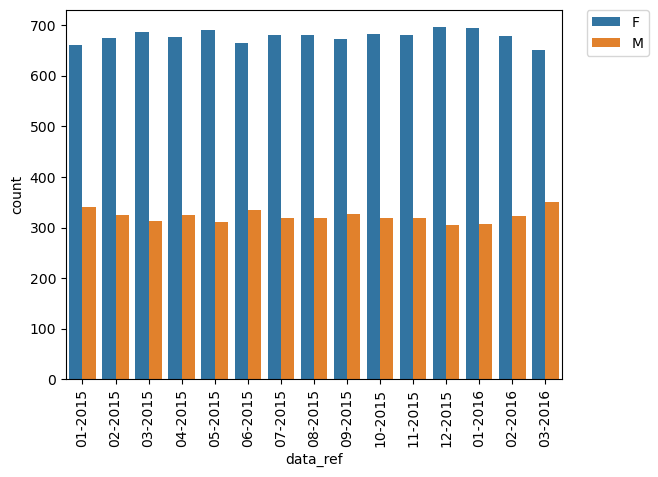

In [16]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

ax = sns.countplot(x='data_ref', hue = 'sexo', data=df)
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs,rotation=90)

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

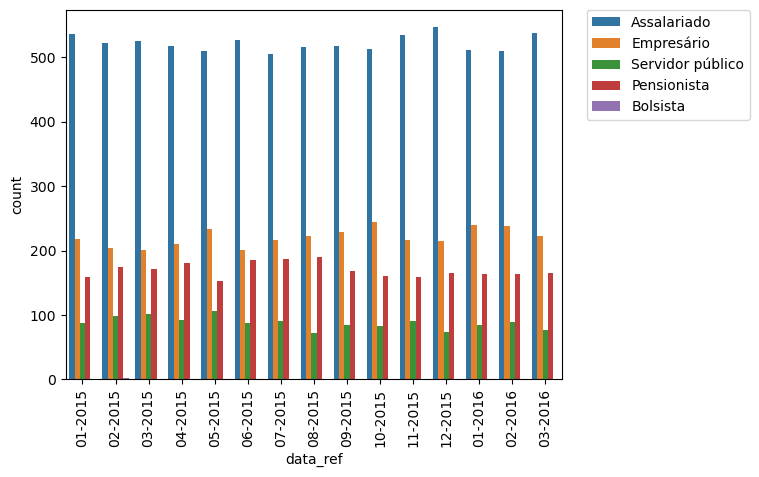

In [18]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

ax = sns.countplot(x='data_ref', hue = 'tipo_renda', data=df)
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs,rotation=90)

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

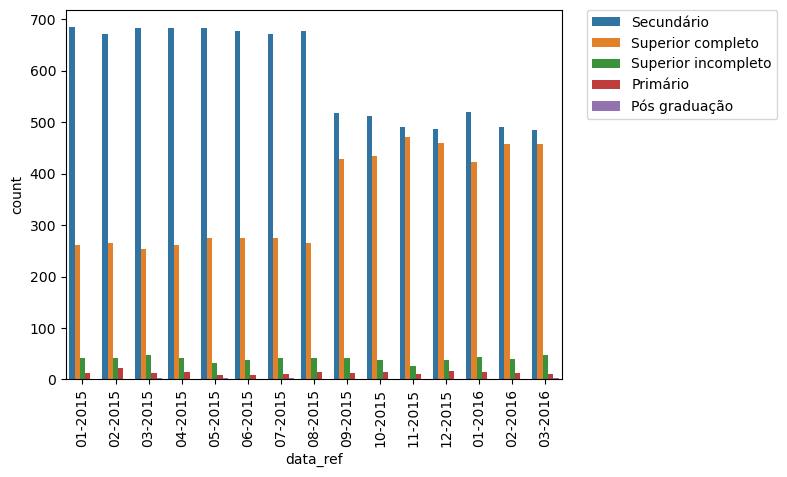

In [22]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

ax = sns.countplot(x='data_ref', hue = 'educacao', data=df)
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs,rotation=90)

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

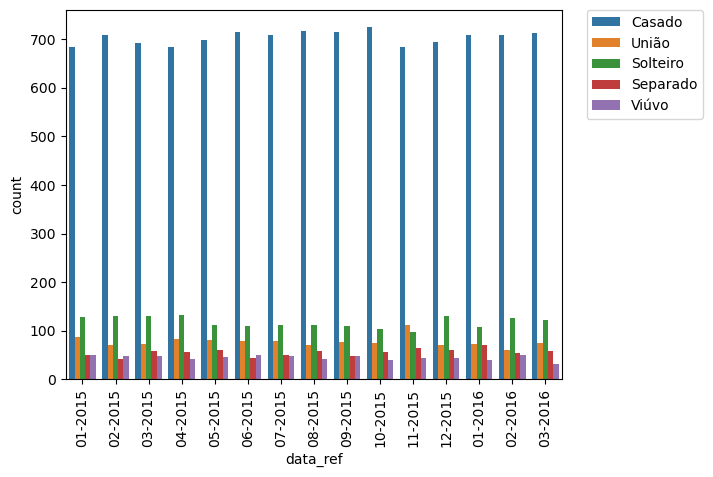

In [24]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

ax = sns.countplot(x='data_ref', hue = 'estado_civil', data=df)
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs,rotation=90)

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

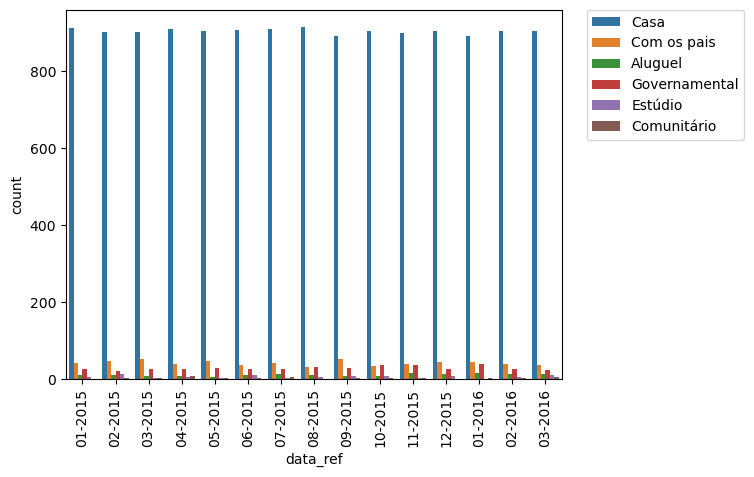

In [28]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

ax = sns.countplot(x='data_ref', hue = 'tipo_residencia', data=df)
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs,rotation=90)

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

Analisando as variaveis sexo, tipo_renda, estado_civil, educacao e tipo_residencia pode-se notar que apenas educacao apresentou um comportamento importante a ser investigado, visto que a frequencia com superior completo salta entre os meses de agosto e setembro de 2015, e os clientes com secundario cai no mesmo periodo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [33]:
df.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object

In [44]:
df_quant = df[['data_ref','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]
df_quant.head()

,data_ref,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,1,36,3.575342,3.0,3369.24
1,2015-01-01,0,42,0.860274,2.0,6096.14
2,2015-01-01,2,31,8.065753,4.0,5658.98
3,2015-01-01,0,50,1.208219,2.0,7246.69
4,2015-01-01,0,52,13.873973,2.0,4017.37


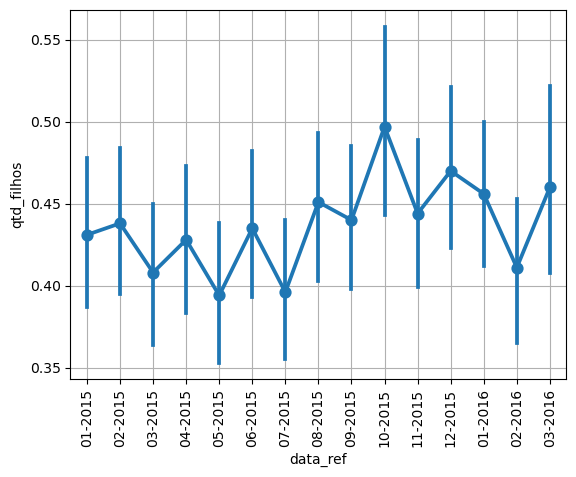

In [52]:
ax = sns.pointplot(x="data_ref",y="qtd_filhos",data=df_quant,dodge=True,errorbar=('ci',95))

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.grid(True)

labels = ax.set_xticklabels(tick_labs,rotation=90)

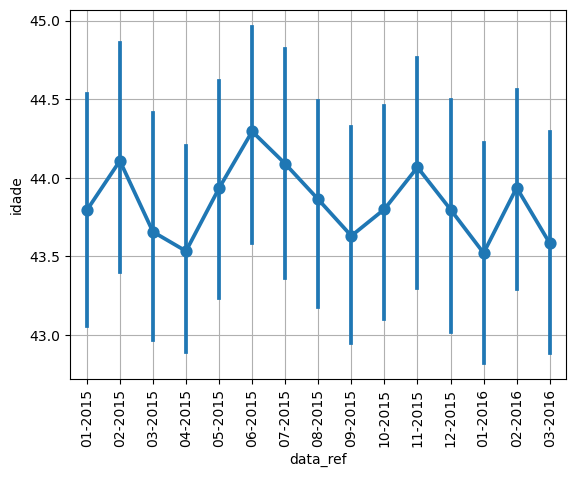

In [54]:
ax = sns.pointplot(x="data_ref",y="idade",data=df_quant,dodge=True,errorbar=('ci',95))

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.grid(True)

labels = ax.set_xticklabels(tick_labs,rotation=90)

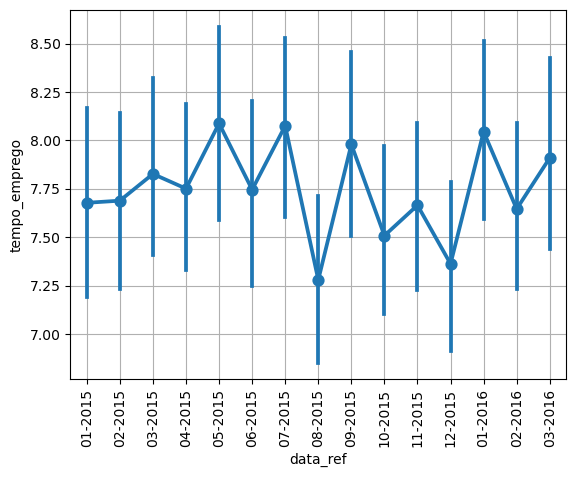

In [56]:
ax = sns.pointplot(x="data_ref",y="tempo_emprego",data=df_quant,dodge=True,errorbar=('ci',95))

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.grid(True)

labels = ax.set_xticklabels(tick_labs,rotation=90)

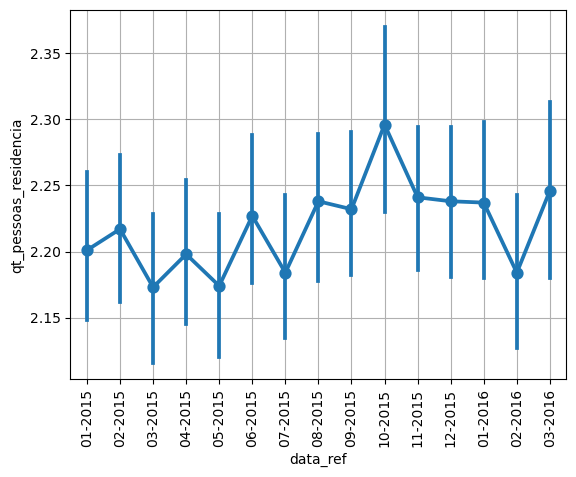

In [60]:
ax = sns.pointplot(x="data_ref",y="qt_pessoas_residencia",data=df_quant,dodge=True,errorbar=('ci',95))

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.grid(True)

labels = ax.set_xticklabels(tick_labs,rotation=90)

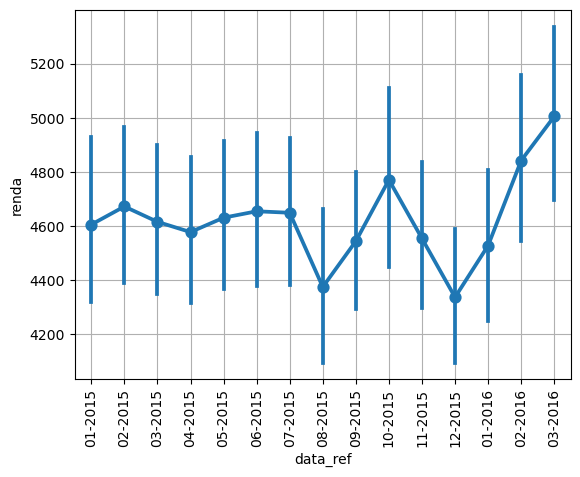

In [62]:
ax = sns.pointplot(x="data_ref",y="renda",data=df_quant,dodge=True,errorbar=('ci',95))

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.grid(True)

labels = ax.set_xticklabels(tick_labs,rotation=90)

Todas as variaveis apresentam alguma estabilidade quando analisadas ao longo do tempo, considerando as escalas as quais sao observadas. Por exemplo a variavel tempo_emprego apresenta pouca variacao visto que o valor minimo eh proximo de 7.25 e o maximo pouco acima de 8. Porem a variavel que apresentou um ponto de atencao e eh a renda, visto que ha um crescimento de sua media entre dezembro de 2015 e marco de 2016 de 4400 para 5000 aproximadamente.